In [2]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy import sparse
from scipy.sparse import csgraph
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import scipy.optimize as op

In [207]:
mcc = pd.read_table('/home/fatemeh/projects/mantis/build/tmp2.clustersize', header=None)
#mcc = pd.read_table('/mnt/scratch2/fatemeh/mantis/final_out_first200/clustersize.dst', header=None)
mcc.head()
mcc.columns = ['val']
mcc['idx'] = mcc['val']
what_rob_wants = mcc.groupby('idx').sum().reset_index()
#plt.hist(np.log2(mcc['val']), bins=100)

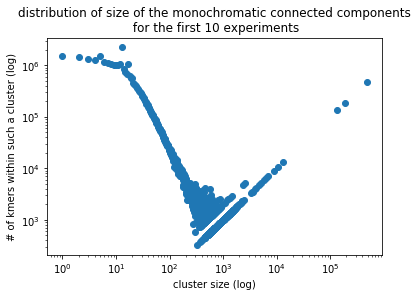

In [208]:
plt.scatter(what_rob_wants['idx'], what_rob_wants['val'])
plt.xscale("log")
plt.yscale('log')
plt.xlabel('cluster size (log)')
plt.ylabel('# of kmers within such a cluster (log)')
plt.title('distribution of size of the monochromatic connected components\n for the first 10 experiments')
plt.savefig('/mnt/scratch2/fatemeh/mantis/final_out_first200/clustersize10.pdf')

# of isolated nodes: 1015534
# of nodes with max dist 0: 153191741
max dist 0 divided by # of neigbors:
[14223821, 137498133, 1246790, 161550, 33861, 10115, 4868, 12603]
# of nodes with a non-0 dist: 70297136


Text(0.5,1,'neighbor count distribution')

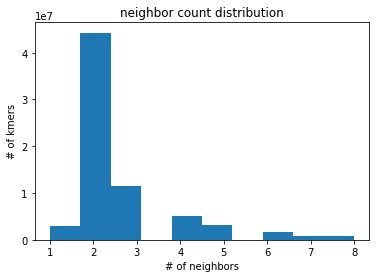

In [235]:
print("# of isolated nodes: {}".format(1015534))
print("# of nodes with max dist 0: {}".format(153191741))
print("max dist 0 divided by # of neigbors:")
print([14223821,137498133,1246790,161550,33861,10115,4868,12603])
#dist = pd.read_table('/mnt/scratch2/fatemeh/mantis/dist200.out', header=None)
#dist.columns = ['cnt', 'min', 'mean', 'max']
print("# of nodes with a non-0 dist: {}".format(len(dist)))
plt.hist(dist['cnt'])
plt.xlabel("# of neighbors")
plt.ylabel("# of kmers")
plt.title("neighbor count distribution")

Text(0.5,1,'min distance distribution')

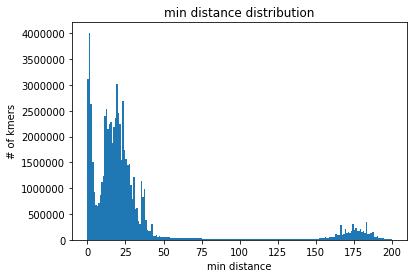

In [236]:
x=plt.hist(dist[dist['cnt'] != 0]['min'], bins=200)
plt.xlabel("min distance")
plt.ylabel("# of kmers")
plt.title("min distance distribution")

Text(0.5,1,'distance mean distribution')

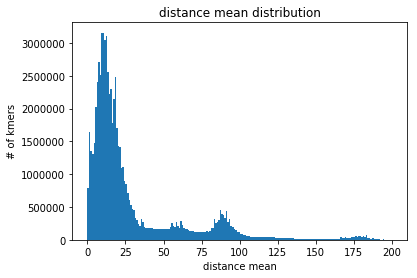

In [237]:
x=plt.hist(dist[dist['cnt'] != 0]['mean'], bins=200)
plt.xlabel("distance mean")
plt.ylabel("# of kmers")
plt.title("distance mean distribution")

Text(0.5,1,'max distance distribution')

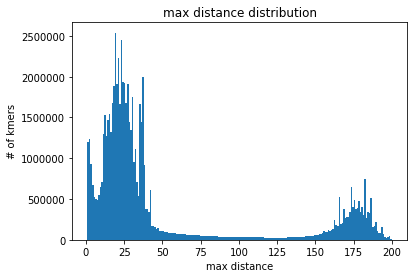

In [238]:
x=plt.hist(dist[dist['cnt'] != 0]['max'], bins=200)
plt.xlabel("max distance")
plt.ylabel("# of kmers")
plt.title("max distance distribution")

In [2]:
mutinf_df = pd.read_csv('/home/fatemeh/projects/mantis2/mantis/newOrder3.out.mutinfo', sep='\t', header=None)
mutinf_df.columns = ['i', 'j', 'mutinf']

In [3]:
dist_df = pd.read_csv('/home/fatemeh/projects/mantis2/mantis/newOrder3.out', sep='\t', header=None)
dist_df.columns = ['i', 'j', 'dist']

# Side To Side Approach

Input : D (distance matrix n-by-n) and X ().

1. Set X0 = X, t = 0, define P−1 = In×n.

2. Calculate St = DXt.

3. Find Pt which sorts St in a descending order.

4. If PtSt ≠ Pt−1St, set Xt+1 = PtTX0, set t = t + 1 and go to 2.

5. Output PtDPtT.

In [27]:
def sts(dist, n):
    p = np.identity(n)
    x0 = np.matrix([[(i - (n + 1)/2)] for i in range(n)])
    
    x = x0
    prevp = np.identity(n)
    cntr = 0
    while True:
        cntr += 1
        s = dist*x
        sidx = np.argsort(s.flatten())
        p = np.zeros( (n,n) )
        for i in range(n):
            p[n-i-1][sidx[0,i]] = 1
        if np.array_equal(p*s, prevp*s):
            break
        x = p.transpose()*x0
        prevp = p
        if cntr % 100 == 0:
            print("{} iterations passed ..".format(cntr), end='\r', flush=True),
        w = np.matmul(x0, x0.transpose())
        print(np.trace(np.matmul(np.matmul(np.matmul(p,dist),p.transpose()), w)))
    print('{} iterations'.format(cntr))
    return np.nonzero(p)[1], np.matmul(np.matmul(p,dist),p.transpose())

In [ ]:
def greedy(dist, n):
    
    print('{} iterations'.format(cntr))
    return np.nonzero(p)[1], np.matmul(np.matmul(p,dist),p.transpose())

## Inverted Mutual Information Matrix

In [5]:
n = 2586
eps = 0.000001
mutinf_recip = np.zeros([n, n])
for idx, row in mutinf_df.iterrows():
    mutinf_recip[int(row['i']), int(row['j'])] = 1/(row['mutinf']+eps)
for i in range(2586):
    mutinf_recip[i,i] = 0

Text(0.5,1,'original')

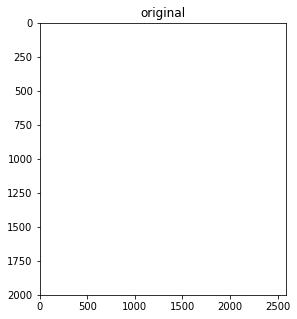

In [162]:
fake_randOrder = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/first1m/first1m.matrix', header=None)
#fake_newOrder = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/tstreal128/test_128m_reordered_ham.matrix', header=None)
#fake = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/tstreal128/test_128m_reordered_mutinf.matrix', header=None)

cols=0
cole=2586
rows=2000
plt.figure(figsize=[15,5])
ax1 = plt.subplot(131)
plt.imshow(fake_randOrder.head(rows).iloc[:,cols:cole], cmap='hot', interpolation='nearest', aspect='auto')
plt.title('original')
# plt.subplot(132)
# plt.imshow(fake_newOrder.head(rows).iloc[:,cols:cole], cmap='hot', interpolation='nearest', aspect='auto')
# plt.title('reordered based on hamming dist.')
# plt.subplot(133)
# plt.imshow(fake.head(rows).iloc[:,cols:cole], cmap='hot', interpolation='nearest', aspect='auto')
# plt.title('reordered based on mutual info.')
# plt.show()

In [174]:
t[3].sum()

2586.0

In [166]:
#first1m = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/first1m/first1m.matrix', header=None)
#t = first1m.transpose()
for i in range(0,2000):
    for j in range(i+1,2000):
        if (t[i]-t[j]).sum() == 0:
            print('i:{}, j:{}'.format(i,j))
            break

i:1, j:8
i:2, j:3
i:3, j:4
i:4, j:5
i:5, j:6
i:6, j:7
i:7, j:9
i:8, j:59
i:9, j:10
i:10, j:11
i:11, j:12
i:12, j:13
i:13, j:14
i:14, j:15
i:15, j:16
i:16, j:17
i:17, j:18
i:18, j:19
i:19, j:20
i:20, j:21
i:21, j:22
i:22, j:23
i:23, j:24
i:24, j:25
i:25, j:26
i:26, j:27
i:27, j:28
i:28, j:29
i:29, j:30
i:30, j:31
i:31, j:32
i:32, j:33
i:33, j:34
i:34, j:35
i:35, j:36
i:36, j:37
i:37, j:38
i:38, j:39
i:39, j:40
i:40, j:41
i:41, j:42
i:42, j:43
i:43, j:44
i:44, j:45
i:45, j:46
i:46, j:47
i:47, j:48
i:48, j:49
i:49, j:50
i:50, j:51
i:51, j:52
i:52, j:53
i:53, j:54
i:54, j:55
i:55, j:56
i:56, j:57
i:57, j:58
i:58, j:60
i:59, j:71
i:60, j:61
i:61, j:62
i:62, j:63
i:63, j:64
i:64, j:65
i:65, j:66
i:66, j:67
i:67, j:68
i:68, j:69
i:69, j:70
i:70, j:72
i:71, j:88
i:72, j:73
i:73, j:74
i:74, j:75
i:75, j:76
i:76, j:77
i:77, j:78
i:78, j:79
i:79, j:80
i:80, j:81
i:81, j:82
i:82, j:83
i:83, j:84
i:84, j:85
i:85, j:86
i:86, j:87
i:87, j:89
i:88, j:154
i:89, j:90
i:90, j:91
i:91, j:92
i:92, j:93
i:9

i:840, j:930
i:841, j:842
i:842, j:843
i:843, j:844
i:844, j:845
i:845, j:846
i:846, j:847
i:847, j:848
i:848, j:849
i:849, j:850
i:850, j:851
i:851, j:852
i:852, j:853
i:853, j:854
i:854, j:855
i:855, j:856
i:856, j:857
i:857, j:858
i:858, j:859
i:859, j:860
i:860, j:861
i:861, j:862
i:862, j:863
i:863, j:864
i:864, j:865
i:865, j:866
i:866, j:867
i:867, j:868
i:868, j:869
i:869, j:870
i:870, j:871
i:871, j:872
i:872, j:873
i:873, j:874
i:874, j:875
i:875, j:876
i:876, j:877
i:877, j:878
i:878, j:879
i:879, j:880
i:880, j:881
i:881, j:882
i:882, j:883
i:883, j:884
i:884, j:885
i:885, j:886
i:886, j:887
i:887, j:888
i:888, j:889
i:889, j:890
i:890, j:891
i:891, j:892
i:892, j:893
i:893, j:894
i:894, j:895
i:895, j:896
i:896, j:897
i:897, j:898
i:898, j:899
i:899, j:900
i:900, j:901
i:901, j:902
i:902, j:903
i:903, j:904
i:904, j:905
i:905, j:906
i:906, j:907
i:907, j:908
i:908, j:909
i:909, j:910
i:910, j:911
i:911, j:912
i:912, j:913
i:913, j:914
i:914, j:915
i:915, j:916
i:916, j:917

i:1773, j:1774
i:1774, j:1775
i:1775, j:1776
i:1776, j:1778
i:1777, j:1781
i:1778, j:1779
i:1779, j:1780
i:1780, j:1782
i:1781, j:1808
i:1782, j:1783
i:1783, j:1784
i:1784, j:1785
i:1785, j:1786
i:1786, j:1787
i:1787, j:1788
i:1788, j:1789
i:1789, j:1790
i:1790, j:1791
i:1791, j:1792
i:1792, j:1793
i:1793, j:1794
i:1794, j:1795
i:1795, j:1796
i:1796, j:1797
i:1797, j:1798
i:1798, j:1799
i:1799, j:1800
i:1800, j:1801
i:1801, j:1802
i:1802, j:1803
i:1803, j:1804
i:1804, j:1805
i:1805, j:1806
i:1806, j:1807
i:1807, j:1809
i:1808, j:1846
i:1809, j:1810
i:1810, j:1811
i:1811, j:1812
i:1812, j:1813
i:1813, j:1814
i:1814, j:1815
i:1815, j:1816
i:1816, j:1817
i:1817, j:1818
i:1818, j:1819
i:1819, j:1820
i:1820, j:1821
i:1821, j:1822
i:1822, j:1823
i:1823, j:1824
i:1824, j:1825
i:1825, j:1826
i:1826, j:1827
i:1827, j:1828
i:1828, j:1829
i:1829, j:1830
i:1830, j:1831
i:1831, j:1832
i:1832, j:1833
i:1833, j:1834
i:1834, j:1835
i:1835, j:1836
i:1836, j:1837
i:1837, j:1838
i:1838, j:1839
i:1839, j:

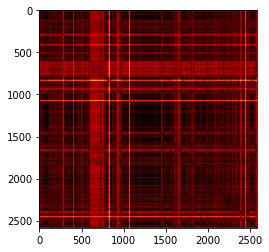

-3.02582128752e+15
-3.50561729212e+15
-1.10614438189e+16
-1.77781500546e+16
-1.79903762205e+16
-1.79960967145e+16
-1.79962404598e+16
-1.79962430893e+16
-1.79962431617e+16
-1.79962431624e+16
-1.79962431624e+16
12 iterations


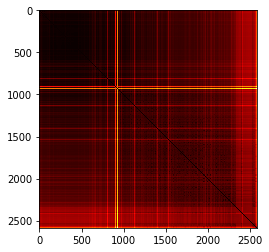

In [117]:
mutinf_joint_dist = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/tstreal128/test_128m.ham', header=None)
#print(len(mutinf_joint_dist))
#print(mutinf_joint_dist.head())
first = mutinf_joint_dist.as_matrix()
plt.imshow(first, cmap='hot', interpolation='nearest')
plt.show()
p, second = sts(first, 2586)
plt.imshow(second, cmap='hot', interpolation='nearest')
plt.show()

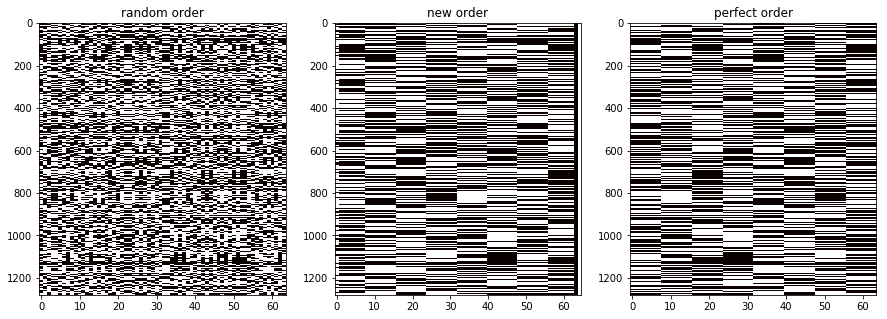

In [89]:
fake_randOrder = pd.read_table('/mnt/scratch3/MatReorder/fake_randOrder.matrix', header=None)
fake_newOrder = pd.read_table('/mnt/scratch3/MatReorder/fake_newOrder.matrix', header=None)
fake = pd.read_table('/mnt/scratch3/MatReorder/fake.matrix', header=None)
plt.figure(figsize=[15,5])
ax1 = plt.subplot(131)
plt.imshow(fake_randOrder, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('random order')
plt.subplot(132)
plt.imshow(fake_newOrder, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('new order')
plt.subplot(133)
plt.imshow(fake, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('perfect order')
plt.show()

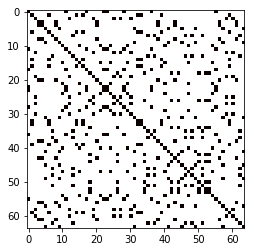

-336774.9504
2 iterations


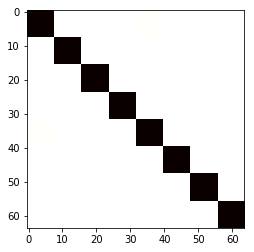

In [123]:
mutinf_joint_dist = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/matReorder_pipelineTest/fake_randOrder.mutinv', header=None)
#print(len(mutinf_joint_dist))
#print(mutinf_joint_dist.head())
first = mutinf_joint_dist.as_matrix()
plt.imshow(first, cmap='hot', interpolation='nearest')
plt.show()
p, second = sts(first, 64)
#print(p)
#second = np.load('/mnt/scratch3/MatReorder/reordered_dist.mat.npy')
plt.imshow(second, cmap='hot', interpolation='nearest')
plt.show()
#np.savetxt('/mnt/scratch3/fatemeh/matReorder_pipelineTest/fake_mutinv_newOrder.out', p, delimiter='\t', fmt='%d')

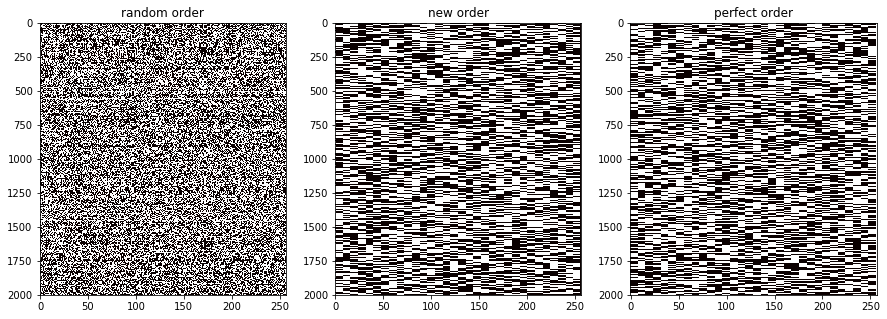

In [121]:
fake_randOrder = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/tst2to20by256/fake_randOrder.matrix', header=None)
fake_newOrder = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/tst2to20by256/fake_randOrder_reordered_mutinf.matrix', header=None)
fake = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/tst2to20by256/fake.matrix', header=None)
plt.figure(figsize=[15,5])
ax1 = plt.subplot(131)
plt.imshow(fake_randOrder, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('random order')
plt.subplot(132)
plt.imshow(fake_newOrder, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('new order')
plt.subplot(133)
plt.imshow(fake, cmap='hot', interpolation='nearest', aspect='auto')
plt.title('perfect order')
plt.show()

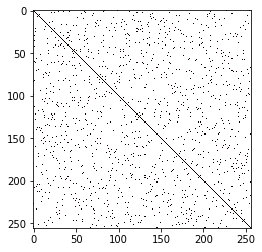

-22220818.9466
2 iterations


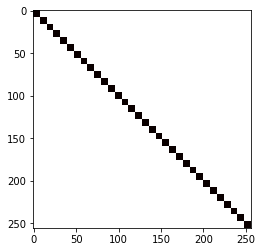

In [125]:
mutinf_joint_dist = pd.read_table('/mnt/scratch3/fatemeh/matrixReorder/tst2to20by256/fake_randOrder.mutinf', header=None)
first = mutinf_joint_dist.as_matrix()
plt.imshow(first, cmap='hot', interpolation='nearest')
plt.show()
p, second = sts(first, 256)
plt.imshow(second, cmap='hot', interpolation='nearest')
plt.show()

In [71]:
mutinf_joint_dist = pd.read_table('/mnt/scratch3/MatReorder/fake_randOrder.dist', header=None)
d = mutinf_joint_dist.as_matrix()
np.save('/mnt/scratch3/MatReorder/fake_randOrder.dist.npy', d)

In [72]:
np.load('/mnt/scratch3/MatReorder/reordered_dist.mat.npy')

array([[  0,   0,   0, ..., 637, 637, 637],
       [  0,   0,   0, ..., 637, 637, 637],
       [  0,   0,   0, ..., 637, 637, 637],
       ..., 
       [637, 637, 637, ...,   0,   0,   0],
       [637, 637, 637, ...,   0,   0,   0],
       [637, 637, 637, ...,   0,   0,   0]])

In [39]:
mutinf_joint_p, mutinf_joint_reordered = sts(mutinf_joint_dist.as_matrix(), 64)

-336774.9504
2 iterations


In [61]:
np.save('/home/fatemeh/projects/mantis2/mantis/mutinfo_joint.dist', mutinf_joint_dist)

## Hamming Distance Matrix

In [284]:
n = 2586
ham_dist = np.zeros([n, n])
for idx, row in dist_df.iterrows():
    ham_dist[row['i'], row['j']] = row['dist']

In [418]:
ham_p, ham_reordered_dist = sts(ham_dist, 2586)

12 iterations


## Inverted Hamming Distance Matrix

In [412]:
def invertMat(x):
    return 1/(eps+x)
invertMat = np.vectorize(invertMat, otypes=[np.float])
inverted_ham_dist = invertMat(ham_dist)

In [468]:
#inverted_ham_p, inverted_ham_reordered_dist = sts(inverted_ham_dist, 2586)
#68000 iterations passed ..

## Sample 4-by-4 Matrix

In [128]:
n = 4
sample_dist = np.matrix([[0,4,3,1], [4,0,1,3], [3,1,0,2], [1,3,2,0]])
sample_p, sampe_reordered_dist = sts(sample_dist, n)

3.0
2 iterations


# STS : Results and Plots

In [411]:
np.savetxt('/home/fatemeh/projects/mantis2/mantis/sts_mutinf_newOrder.out', mutinf_p, delimiter='\t', fmt='%d')

# Hamming Distance
34M
## Original

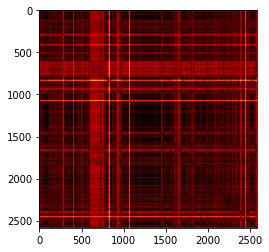

In [381]:
plt.imshow(dist, cmap='hot', interpolation='nearest')
plt.show()

# Reordered

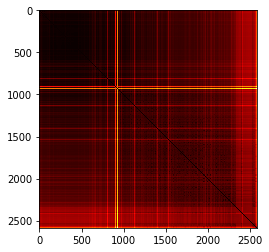

In [404]:
plt.imshow(ham_reordered_dist, cmap='hot', interpolation='nearest')
plt.show()

# Inverted Mutual Information
35M
## Original

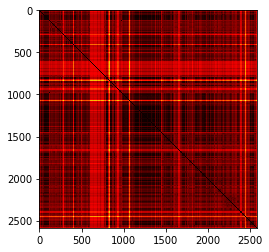

In [8]:
plt.imshow(mutinf_joint_dist, cmap='hot', interpolation='nearest')
plt.show()

## Reordered

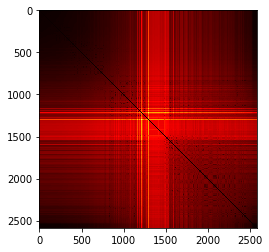

In [63]:
reordered = np.load('/mnt/scratch3/reord.npy')
plt.imshow(reordered, cmap='hot', interpolation='nearest')
plt.show()

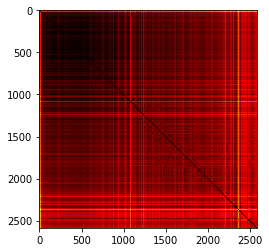

In [9]:
plt.imshow(mutinf_joint_reordered, cmap='hot', interpolation='nearest')
plt.show()

In [73]:
ar = np.arange(20, 30, 1)
order = np.array([7, 5, 4, 1, 9, 3, 8, 2, 6, 0])
print(ar)
print(order)
ar = ar[np.ix_(order)]
print(ar)
ar = ar[np.ix_(order)]
ar

[20 21 22 23 24 25 26 27 28 29]
[7 5 4 1 9 3 8 2 6 0]
[27 25 24 21 29 23 28 22 26 20]


array([22, 23, 29, 25, 20, 21, 26, 24, 28, 27])

In [11]:
np.savetxt('/home/fatemeh/projects/mantis2/mantis/mutinf_joint_newOrder.out', mutinf_joint_p, delimiter='\t', fmt='%d')

In [482]:
original_mutinfo_reordered = np.matmul(np.matmul(mutinf_p,mutinf),mutinf_p.transpose())
#plt.imshow(original_mutinfo_reordered, cmap='hot', interpolation='nearest')
#plt.show()

In [484]:
original_mutinfo_reordered.transpose()

113067949223.07956

# Linkage Clustering
from https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html

In [455]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = ssd.squareform(dist_mat)
    res_linkage = sch.linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

## Single Linkage
33M

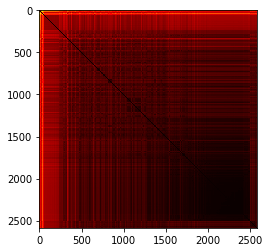

In [464]:
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(ham_dist, "single")
np.savetxt('/home/fatemeh/projects/mantis2/mantis/linkSingle_ham_newOrder.out', res_order, delimiter='\t', fmt='%d')
plt.imshow(ordered_dist_mat, cmap='hot', interpolation='nearest')
plt.show()

## Complete Linkage
31M

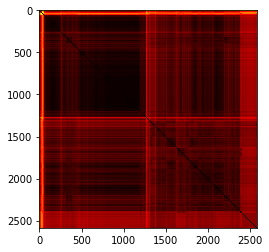

In [465]:
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(ham_dist, "complete")
np.savetxt('/home/fatemeh/projects/mantis2/mantis/linkComplete_ham_newOrder.out', res_order, delimiter='\t', fmt='%d')
plt.imshow(ordered_dist_mat, cmap='hot', interpolation='nearest')
plt.show()

## Centroid Linkage
33M

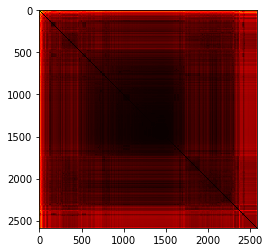

In [466]:
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(ham_dist, "centroid")
np.savetxt('/home/fatemeh/projects/mantis2/mantis/linkCentroid_ham_newOrder.out', res_order, delimiter='\t', fmt='%d')
plt.imshow(ordered_dist_mat, cmap='hot', interpolation='nearest')
plt.show()

## Single Linkage for Inverted Mutual Information Matrix
34M

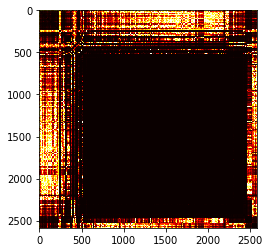

In [467]:
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(mutinf_recip, "single")
np.savetxt('/home/fatemeh/projects/mantis2/mantis/linkSingle_mutinf_newOrder.out', res_order, delimiter='\t', fmt='%d')
plt.imshow(ordered_dist_mat, cmap='hot', interpolation='nearest')
plt.show()

# Neighborhood

Input : Dn×n and Wn×n

(1) Set W0 = W, P −1 = In×n, t = 0.

(2) Compute Mt = DWt

(3) Set Pt = argminQ∈Sn tr(QMt)

(4) If tr(PtMt) != tr(Pt−1Mt−1), set Wt+1 = Pt TW,
t = t + 1 and go to 2.
(5) Output Pt DPt T.

In [134]:
n=4
sigma = 1
w0 = np.matrix([[np.exp((-1*(i-j)**2)/(n*sigma)) for i in range(n)] for j in range(n)])

In [144]:
sample_dist = np.matrix([[0,4,3,1], [4,0,1,3], [3,1,0,2], [1,3,2,0]])
prevp = np.identity( n )
prevm=np.zeros([n,n])

In [145]:
cntr = 0
while True:
    print(cntr)
    cntr+=1
    m=sample_dist*w
    rowIdx, colIdx = op.linear_sum_assignment(m)
    p = np.zeros( (n,n) )
    for i in range(len(rowIdx)):
        p[rowIdx[i], colIdx[i]] = 1
#     print(p)
#     print(m)
#     print(np.trace(np.matmul(p, m)))
#     print(prevp)
#     print(prevm)
#     print(np.trace(np.matmul(prevp, prevm)))
    if np.trace(np.matmul(p, m)) == np.trace(np.matmul(prevp, prevm)):
        break
    w = np.matmul(p.transpose(), w0)
    prevp = p
    prevm = m
np.matmul(np.matmul(p,sample_dist),p.transpose())

0
1


matrix([[ 0.,  4.,  3.,  1.],
        [ 4.,  0.,  1.,  3.],
        [ 3.,  1.,  0.,  2.],
        [ 1.,  3.,  2.,  0.]])

In [ ]:
np.trace(np.matmul(p, m))

In [21]:
df = pd.read_csv('/home/fatemeh/projects/mantis2/mantis/edit.dist', sep='\t')
df.head()
df.columns = ['i', 'j', 'd']

In [25]:
print(df.d.min())
print(df.d.max())

9127650.0
120401000.0


In [ ]:
#df.sort_values(['d']).d.unique()

# Cuthill Mckee

In [300]:
print('mutinfo mean: {}'.format(mutinf_df.mutinf.mean()))
print('mutinfo median: {}'.format(mutinf_df.mutinf.median()))
print('hamming dist mean: {}'.format(dist_df.dist.mean()))
print('hamming dist median: {}'.format(dist_df.dist.median()))

mutinfo mean: 0.009691046269140824
mutinfo median: 0.00140579
hamming dist mean: 24214.566500348104
hamming dist median: 19622.0


In [216]:
res = pd.merge(mutinf_df, dist_df, on = ['i', 'j'], how='inner')

In [255]:
def thresh_filter(row):
    if row['mutinf'] >= 0.01:
        return 1
    return 0
mutinf_df['adj'] = mutinf_df.apply(thresh_filter, axis=1)

In [249]:
def thresh_filter(row):
    if row['dist'] >= 0.003:
        return 1
    return 0
dist_df['adj'] = dist_df.apply(thresh_filter, axis=1)

In [252]:
sim = sparse.csr_matrix((mutinf_df.adj, (mutinf_df.i, mutinf_df.j)))

In [253]:
newOrder = csgraph.reverse_cuthill_mckee(sim, symmetric_mode=True)

In [257]:
newOrder[0:10]

array([1336, 1319, 2585, 2584, 2583, 2582, 2581, 2580, 2579, 2578], dtype=int32)

In [246]:
np.savetxt('/home/fatemeh/projects/mantis2/mantis/mutinfo_newOrder.out', newOrder, delimiter='\t', fmt='%d')